In [1]:
import numpy as np
from kmodes.kmodes import KModes
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df=pd.read_csv("data/report_anonymous_clean.csv", sep=";", encoding = 'utf8')

# drop cols 'Unnamed 0'
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [3]:
df.columns

Index(['ETA_PRELIEVO', 'DATA_PRELIEVO', 'DATA_ULTIMA_MESTRUAZIONE',
       'DATA_PAP_PRECEDENTE', 'FORNICE', 'PORTIO', 'CAN_CERV', 'CAV_UT',
       'PERDITE_ER', 'LEUCORREA', 'PRURITO', 'TER_RAD', 'TER_ORM',
       'GRAVIDANZE', 'ABORTI', 'TEST_ESTR', 'TER_ANTIF', 'OP_GIN', 'MENOPAUSA',
       'AMENORREA', 'POST_PARTUM', 'PRIMO_PAP', 'CITO_PREC', 'VIRALE_PREC',
       'BATT_PREC', 'CONTROLLO', 'CTRL_ISTOLOGICO', 'VALIDITA_CAMPIONE',
       'CAUSA_CAMPIONE_NON_VALIDO', 'BATT', 'CITO', 'VIRALE'],
      dtype='object')

In [4]:
columns = ['ETA_PRELIEVO','GRAVIDANZE','ABORTI','CITO_PREC','CITO']

df_cl = df[columns].copy()

df_cl['CITO'] = df_cl['CITO'].apply(lambda x: 'NEGATIVO' if x == 'NEGATIVO' else 'POSITIVO')
df_cl['CITO_PREC'] = df_cl['CITO_PREC'].apply(lambda x: 'NEGATIVO' if x == 'NEGATIVO' else 'POSITIVO')
df_cl['GRAVIDANZE'] = df_cl['GRAVIDANZE'].apply(lambda x: 'False' if x == 0 else 'True')
df_cl['ABORTI'] = df_cl['ABORTI'].apply(lambda x: 'False' if x == 0 else 'True')

df_cl['ETA_PRELIEVO'] = pd.cut(df_cl['ETA_PRELIEVO'], [10,35,55,75,90],\
                               labels=['10-35','35-55','55-75','75-90'])
df_cl.dropna(inplace=True)
df_cl = df_cl.applymap(str)

print(len(df_cl))

8804


In [5]:
def kmode_cluster(size, method):
    km = KModes(n_clusters=size, init=method, verbose=0)
    clusters = km.fit_predict(df_cl)
    return km

def compute_error(km):
    error = {i: 0 for i in df_cl['CLUSTER'].unique()}
    for index, row in df_cl.iterrows():
        for i, item in enumerate(row[:-1]):
            if item != km.cluster_centroids_[row['CLUSTER']][i]:
                # I'm looking at the 'CITO' value
                if i == len(df_cl.columns)-2:
                    # then I have an higher error 
                    error[row['CLUSTER']] += 100
                error[row['CLUSTER']] += 1
                
        cum_err = 0
        for i in error:
            cum_err += error[i]
    return error, cum_err

def print_centroids(km, size):
    c = 0
    for centroid in km.cluster_centroids_:
        print('centroid ',c,' of ',size-1)
        col = 0
        columns = list(df_cl.columns.values)[:-1]
        for value in centroid[:-1]:
            print('{} : {}'.format(columns[col],value))
            col += 1
        c+=1
        print()

## K-modes clustering with Huang algorithm

In [6]:
size = 20
costs = {i: 0 for i in range(2,size+1)}
cum_errs = {i: 0 for i in range(2,size+1)}

for i in range(2,size+1):
    print("clustering with {} centroids...".format(i))
    print()
    km = kmode_cluster(i, 'Huang') #Cao, Huang
    df_cl['CLUSTER'] = km.labels_
    costs[i] = km.cost_
    errors, cum_errs[i] = compute_error(km)
    
    print_centroids(km, i)
    print("cost: ",km.cost_)
    print("errors: ",errors)
    print("cumulative error: ",cum_errs[i])
    
    print('------------------------------------')
    
    
#centroid  6  of  6
#ETA_PRELIEVO : 35-55
#GRAVIDANZE : False
#ABORTI : False
#CITO_PREC : POSITIVO
#CITO : POSITIVO

clustering with 2 centroids...

centroid  0  of  1
ETA_PRELIEVO : 35-55
GRAVIDANZE : True
ABORTI : False
CITO_PREC : POSITIVO

centroid  1  of  1
ETA_PRELIEVO : 35-55
GRAVIDANZE : False
ABORTI : False
CITO_PREC : POSITIVO

cost:  7171.0
errors:  {1: 32520, 0: 10351}
cumulative error:  42871
------------------------------------
clustering with 3 centroids...

centroid  0  of  2
ETA_PRELIEVO : 10-35
GRAVIDANZE : False
ABORTI : False
CITO_PREC : POSITIVO
CITO : NEGATIVO

centroid  1  of  2
ETA_PRELIEVO : 55-75
GRAVIDANZE : False
ABORTI : False
CITO_PREC : POSITIVO
CITO : NEGATIVO

centroid  2  of  2
ETA_PRELIEVO : 35-55
GRAVIDANZE : False
ABORTI : False
CITO_PREC : POSITIVO
CITO : NEGATIVO

cost:  8883.0
errors:  {2: 18927, 1: 3311, 0: 19475}
cumulative error:  41713
------------------------------------
clustering with 4 centroids...

centroid  0  of  3
ETA_PRELIEVO : 10-35
GRAVIDANZE : False
ABORTI : False
CITO_PREC : NEGATIVO
CITO : NEGATIVO

centroid  1  of  3
ETA_PRELIEVO : 10-35
GRAV

centroid  0  of  11
ETA_PRELIEVO : 10-35
GRAVIDANZE : True
ABORTI : False
CITO_PREC : POSITIVO
CITO : NEGATIVO

centroid  1  of  11
ETA_PRELIEVO : 35-55
GRAVIDANZE : True
ABORTI : False
CITO_PREC : POSITIVO
CITO : NEGATIVO

centroid  2  of  11
ETA_PRELIEVO : 35-55
GRAVIDANZE : True
ABORTI : False
CITO_PREC : NEGATIVO
CITO : NEGATIVO

centroid  3  of  11
ETA_PRELIEVO : 35-55
GRAVIDANZE : False
ABORTI : False
CITO_PREC : POSITIVO
CITO : NEGATIVO

centroid  4  of  11
ETA_PRELIEVO : 10-35
GRAVIDANZE : False
ABORTI : False
CITO_PREC : POSITIVO
CITO : NEGATIVO

centroid  5  of  11
ETA_PRELIEVO : 55-75
GRAVIDANZE : True
ABORTI : False
CITO_PREC : POSITIVO
CITO : NEGATIVO

centroid  6  of  11
ETA_PRELIEVO : 55-75
GRAVIDANZE : False
ABORTI : False
CITO_PREC : POSITIVO
CITO : POSITIVO

centroid  7  of  11
ETA_PRELIEVO : 55-75
GRAVIDANZE : False
ABORTI : False
CITO_PREC : POSITIVO
CITO : NEGATIVO

centroid  8  of  11
ETA_PRELIEVO : 35-55
GRAVIDANZE : False
ABORTI : False
CITO_PREC : NEGATIVO
CITO

centroid  0  of  16
ETA_PRELIEVO : 10-35
GRAVIDANZE : False
ABORTI : False
CITO_PREC : POSITIVO
CITO : NEGATIVO

centroid  1  of  16
ETA_PRELIEVO : 35-55
GRAVIDANZE : False
ABORTI : True
CITO_PREC : NEGATIVO
CITO : NEGATIVO

centroid  2  of  16
ETA_PRELIEVO : 35-55
GRAVIDANZE : True
ABORTI : False
CITO_PREC : POSITIVO
CITO : NEGATIVO

centroid  3  of  16
ETA_PRELIEVO : 35-55
GRAVIDANZE : False
ABORTI : False
CITO_PREC : NEGATIVO
CITO : NEGATIVO

centroid  4  of  16
ETA_PRELIEVO : 35-55
GRAVIDANZE : False
ABORTI : False
CITO_PREC : POSITIVO
CITO : POSITIVO

centroid  5  of  16
ETA_PRELIEVO : 35-55
GRAVIDANZE : True
ABORTI : False
CITO_PREC : NEGATIVO
CITO : NEGATIVO

centroid  6  of  16
ETA_PRELIEVO : 35-55
GRAVIDANZE : False
ABORTI : False
CITO_PREC : POSITIVO
CITO : NEGATIVO

centroid  7  of  16
ETA_PRELIEVO : 10-35
GRAVIDANZE : True
ABORTI : True
CITO_PREC : POSITIVO
CITO : NEGATIVO

centroid  8  of  16
ETA_PRELIEVO : 10-35
GRAVIDANZE : True
ABORTI : False
CITO_PREC : POSITIVO
CITO :

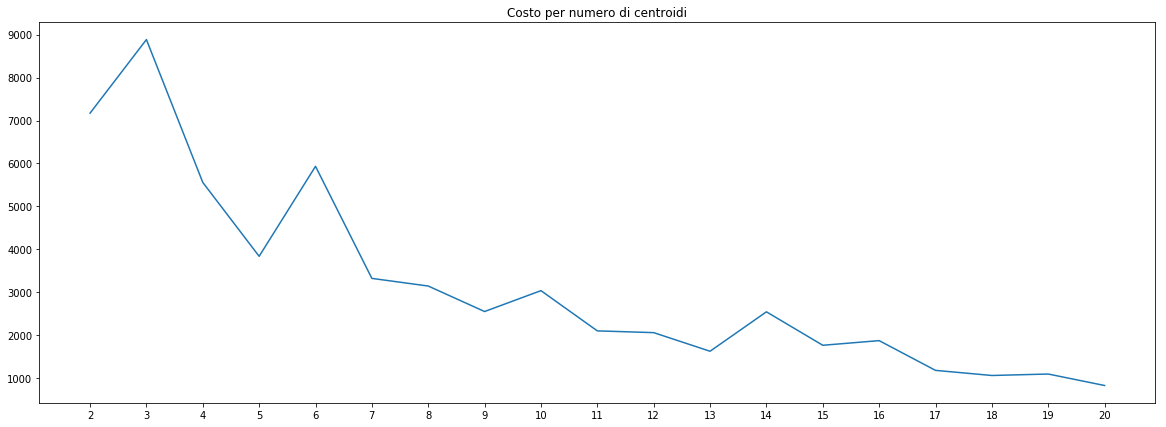

In [7]:
costs_df = pd.DataFrame.from_dict(costs, orient='index')
costs_df.plot(kind='line', title = 'Costo per numero di centroidi', 
              figsize=(20,7), xticks=np.arange(2,size+1), legend=False)

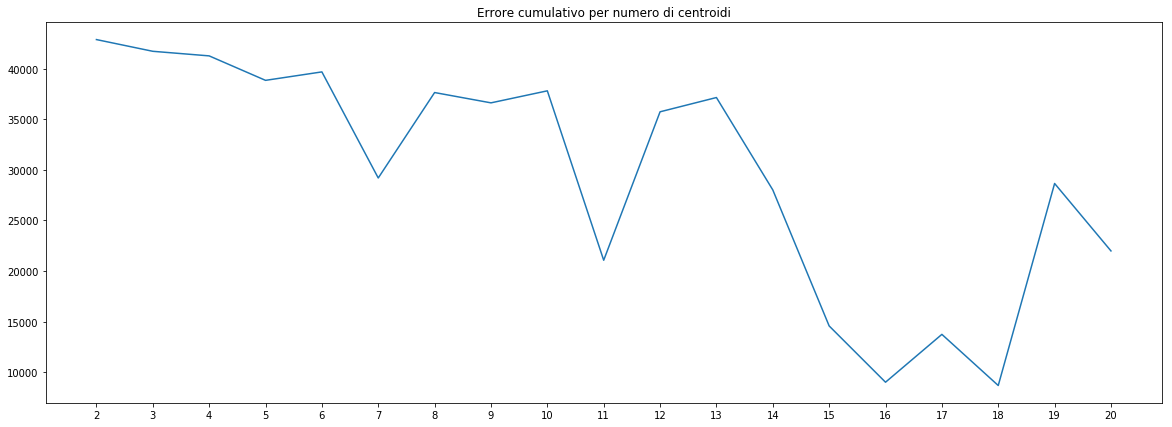

In [8]:
cum_errs_df = pd.DataFrame.from_dict(cum_errs, orient='index')
cum_errs_df.plot(kind='line', title = 'Errore cumulativo per numero di centroidi', 
                 figsize=(20,7), xticks=np.arange(2,size+1), legend=False)

## K-modes clustering with Cao algorithm

In [9]:
size = 20
costs = {i: 0 for i in range(2,size+1)}
cum_errs = {i: 0 for i in range(2,size+1)}

for i in range(2,size+1):
    print("clustering with {} centroids...".format(i))
    print()
    km = kmode_cluster(i, 'Cao') #Cao, Huang
    df_cl['CLUSTER'] = km.labels_
    costs[i] = km.cost_
    errors, cum_errs[i] = compute_error(km)
    
    print_centroids(km, i)
    print("cost: ",km.cost_)
    print("errors: ",errors)
    print("cumulative error: ",cum_errs[i])
    
    print('------------------------------------')
    
#centroid  5  of  5
#ETA_PRELIEVO : 10-35
#GRAVIDANZE : False
#ABORTI : False
#CITO_PREC : POSITIVO
#CITO : POSITIVO

clustering with 2 centroids...

centroid  0  of  1
ETA_PRELIEVO : 35-55
GRAVIDANZE : False
ABORTI : False
CITO_PREC : POSITIVO
CITO : NEGATIVO

centroid  1  of  1
ETA_PRELIEVO : 10-35
GRAVIDANZE : True
ABORTI : False
CITO_PREC : NEGATIVO
CITO : NEGATIVO

cost:  14165.0
errors:  {0: 37511, 1: 6233}
cumulative error:  43744
------------------------------------
clustering with 3 centroids...

centroid  0  of  2
ETA_PRELIEVO : 35-55
GRAVIDANZE : False
ABORTI : False
CITO_PREC : POSITIVO
CITO : NEGATIVO

centroid  1  of  2
ETA_PRELIEVO : 10-35
GRAVIDANZE : True
ABORTI : False
CITO_PREC : NEGATIVO
CITO : NEGATIVO

centroid  2  of  2
ETA_PRELIEVO : 35-55
GRAVIDANZE : True
ABORTI : True
CITO_PREC : POSITIVO
CITO : NEGATIVO

cost:  7192.0
errors:  {0: 35368, 1: 6233, 2: 1291}
cumulative error:  42892
------------------------------------
clustering with 4 centroids...

centroid  0  of  3
ETA_PRELIEVO : 35-55
GRAVIDANZE : False
ABORTI : False
CITO_PREC : POSITIVO
CITO : NEGATIVO

centroid  1  of 

centroid  0  of  11
ETA_PRELIEVO : 35-55
GRAVIDANZE : False
ABORTI : False
CITO_PREC : POSITIVO
CITO : NEGATIVO

centroid  1  of  11
ETA_PRELIEVO : 10-35
GRAVIDANZE : True
ABORTI : False
CITO_PREC : NEGATIVO
CITO : NEGATIVO

centroid  2  of  11
ETA_PRELIEVO : 55-75
GRAVIDANZE : True
ABORTI : False
CITO_PREC : POSITIVO
CITO : NEGATIVO

centroid  3  of  11
ETA_PRELIEVO : 55-75
GRAVIDANZE : False
ABORTI : False
CITO_PREC : NEGATIVO
CITO : NEGATIVO

centroid  4  of  11
ETA_PRELIEVO : 10-35
GRAVIDANZE : False
ABORTI : True
CITO_PREC : POSITIVO
CITO : NEGATIVO

centroid  5  of  11
ETA_PRELIEVO : 35-55
GRAVIDANZE : True
ABORTI : True
CITO_PREC : POSITIVO
CITO : NEGATIVO

centroid  6  of  11
ETA_PRELIEVO : 10-35
GRAVIDANZE : False
ABORTI : False
CITO_PREC : POSITIVO
CITO : POSITIVO

centroid  7  of  11
ETA_PRELIEVO : 35-55
GRAVIDANZE : True
ABORTI : False
CITO_PREC : POSITIVO
CITO : POSITIVO

centroid  8  of  11
ETA_PRELIEVO : 35-55
GRAVIDANZE : False
ABORTI : True
CITO_PREC : NEGATIVO
CITO : 

centroid  0  of  16
ETA_PRELIEVO : 35-55
GRAVIDANZE : False
ABORTI : False
CITO_PREC : POSITIVO
CITO : NEGATIVO

centroid  1  of  16
ETA_PRELIEVO : 10-35
GRAVIDANZE : True
ABORTI : False
CITO_PREC : NEGATIVO
CITO : NEGATIVO

centroid  2  of  16
ETA_PRELIEVO : 55-75
GRAVIDANZE : True
ABORTI : False
CITO_PREC : POSITIVO
CITO : NEGATIVO

centroid  3  of  16
ETA_PRELIEVO : 55-75
GRAVIDANZE : False
ABORTI : False
CITO_PREC : NEGATIVO
CITO : NEGATIVO

centroid  4  of  16
ETA_PRELIEVO : 10-35
GRAVIDANZE : False
ABORTI : True
CITO_PREC : POSITIVO
CITO : NEGATIVO

centroid  5  of  16
ETA_PRELIEVO : 10-35
GRAVIDANZE : False
ABORTI : False
CITO_PREC : POSITIVO
CITO : POSITIVO

centroid  6  of  16
ETA_PRELIEVO : 35-55
GRAVIDANZE : True
ABORTI : True
CITO_PREC : POSITIVO
CITO : NEGATIVO

centroid  7  of  16
ETA_PRELIEVO : 35-55
GRAVIDANZE : True
ABORTI : False
CITO_PREC : POSITIVO
CITO : POSITIVO

centroid  8  of  16
ETA_PRELIEVO : 10-35
GRAVIDANZE : False
ABORTI : False
CITO_PREC : POSITIVO
CITO :

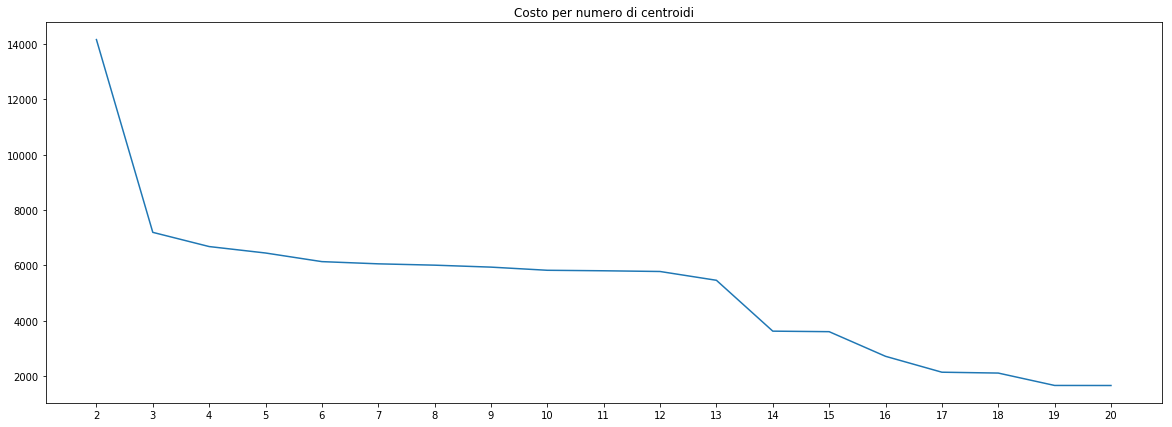

In [10]:
costs_df = pd.DataFrame.from_dict(costs, orient='index')
costs_df.plot(kind='line', title = 'Costo per numero di centroidi', 
              figsize=(20,7), xticks=np.arange(2,size+1), legend=False)

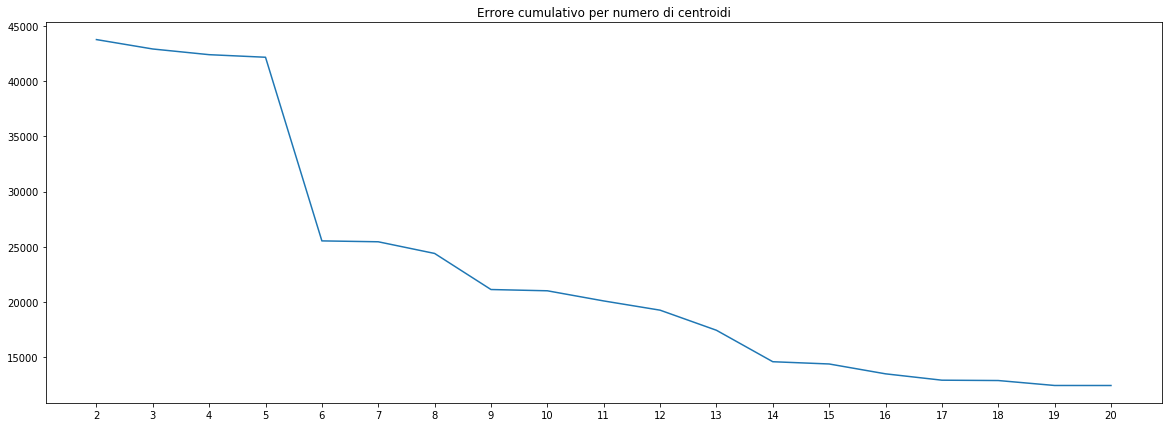

In [11]:
cum_errs_df = pd.DataFrame.from_dict(cum_errs, orient='index')
cum_errs_df.plot(kind='line', title = 'Errore cumulativo per numero di centroidi', 
                 figsize=(20,7), xticks=np.arange(2,size+1), legend=False)